# BetterCare - CARDIOVASCULAR DISEASE DETECTOR

Features:

* Age(int) -> Days
* Height(int) -> cm
* Weight(float) -> kg
* Gender(int) -> 1-Female , 2-Male
* Systolic blood pressure(int)
* Diastolic blood pressure(int)
* Cholesterol(int) -> 1-Normal , 2-Above Normal , 3-Well Above Normal
* Glucose(int) -> 1-Normal , 2-Above Normal , 3-Well Above Normal
* Smoking(int) -> 0-No , 1-Yes
* Alcohol intake(int) -> 0-No , 1-Yes
* Physical activity(int) -> 0-No , 1-Yes
* Presence or absence of cardiovascular disease(int) -> 0-No , 1-Yes

In [1]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

raw_data = pd.read_csv('./cardio_train.csv' , sep=';')
# Check the data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [2]:
raw_data.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
print(f"Missing values are present: {raw_data.isnull().sum().any()}")

Missing values are present: False


> There is no mising value in the data.

- We will drop column 'id' as it is irrelevant to target variable.
- Transform 'age' column into years instead of days.
- Gender feature should not be categorized into 1 and 2 because 2 is always numerically bigger than 1, the model would take into account that and give a bigger ratio to one gender for having a disease. So, I will make that binary.

> We will check and drop duplicates.

In [4]:
raw_data.drop('id',axis=1,inplace=True)
raw_data.age = np.round(raw_data.age/365.25,decimals=1)
raw_data.gender = raw_data.gender.replace(2,0)

In [5]:
raw_data.duplicated().sum()

674

In [6]:
raw_data.drop_duplicates(inplace=True)

# Exploratory Data Analysis and Data Preprocessing

In [7]:
x = raw_data.copy(deep=True)
x.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69326.000000,69326.000000,69326.000000,69326.000000,69326.000000,69326.000000,69326.000000,69326.000000,69326.000000,69326.000000,69326.000000,69326.000000
mean,53.305251,0.648689,164.357283,74.279423,128.900845,96.794262,1.370164,1.228486,0.088957,0.054294,0.802513,0.502279
std,6.763924,0.477383,8.237735,14.432048,154.755350,189.378925,0.682361,0.574375,0.284683,0.226599,0.398106,0.499998
min,29.600000,0.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.300000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.900000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.400000,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.900000,1.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


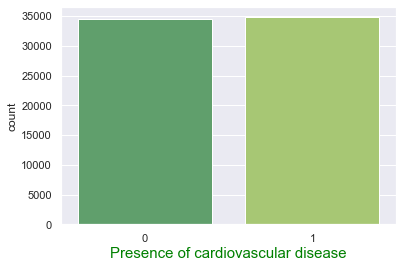

In [8]:
sns.set_style('darkgrid')
sns.countplot(raw_data.cardio,palette='summer')
plt.xlabel('Presence of cardiovascular disease',fontdict={'fontsize': 15,'color':'Green'},labelpad=3);

- So, data is almost balanced. (equal data points for both - not skewed)


- We see which among male/female has more cases of disease. 
- As , there is no knowledge of it , we will see simple fact that males have greater average height than females.

In [9]:
a = raw_data[raw_data["gender"]==0]["height"].mean()
b = raw_data[raw_data["gender"]==1]["height"].mean()
if a > b:
    gender = "male"
    gender1 = "female"
else:
    gender = "female"
    gender1 = "male"
print("Gender: 0 is "+ gender +" & Gender: 1 is " + gender1)

Gender: 0 is male & Gender: 1 is female


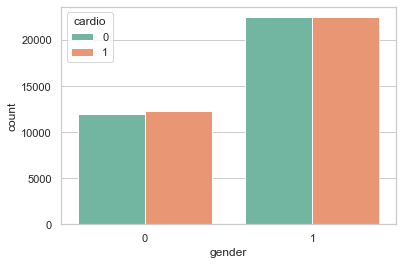

In [10]:
sns.set_style('whitegrid')
sns.countplot(raw_data.gender,hue=raw_data.cardio, palette="Set2");

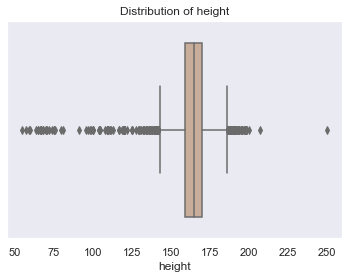

In [11]:
sns.set_style('dark')
sns.boxplot(raw_data.height,palette='pink')
plt.title('Distribution of height');

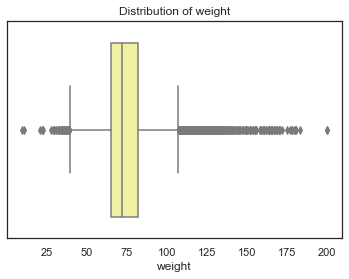

In [12]:
sns.set_style('white')
sns.boxplot(raw_data.weight,palette='terrain')
plt.title('Distribution of weight');

**We will remove Extremely rare cases of height and weight. As data is quite big, there will be no problem while modelling.

In [13]:
raw_data = raw_data[(raw_data['height']<250) & (raw_data['weight']>20.0)]

**There are many outliers in height and weight features. 

- We combine both height and weight into a new feature bmi (is very useful to identify person-health).

In [14]:
raw_data["bmi"] = (raw_data["weight"]/ (raw_data["height"]/100)**2).round(1)

In [15]:
raw_data[raw_data['bmi']<10]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
26806,63.7,1,157,23.0,110,80,1,1,0,0,1,0,9.3
29488,55.9,0,177,22.0,120,80,1,1,1,1,1,0,7.0
60188,59.8,1,162,21.0,120,80,2,1,0,0,1,1,8.0
60699,51.7,1,171,29.0,110,70,2,1,0,0,1,1,9.9


In [16]:
raw_data[raw_data['bmi']>100].sort_values(by='weight',ascending=False).head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
27384,41.9,1,80,178.0,140,90,3,3,0,0,1,1,278.1
8171,48.3,0,97,170.0,160,100,1,1,1,0,1,1,180.7
12770,53.6,1,75,168.0,120,80,1,1,1,0,1,1,298.7
15366,47.7,1,125,167.0,180,90,1,2,0,0,1,1,106.9
20028,54.1,1,112,167.0,180,120,1,1,0,1,1,0,133.1


- Further , we will remove extremely overweight and underweight people 

- Ex , person with height - 80cm , weight - 178 kg seems unrealistic and may be due to noting/observation mistake

- There are some who are dwarf/giant , but these people are rare , genetic exceptions and it is better to consider them separately.

In [17]:
data= raw_data[(raw_data['bmi']>10) & (raw_data['bmi']<100)].copy()

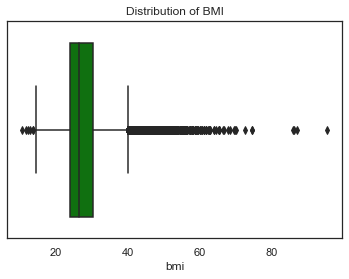

In [18]:
sns.boxplot(data.bmi,color='Green')
plt.title('Distribution of BMI');

In [19]:
#dropped height and weight as bmi is a better measure
data.drop(['weight','height'],axis=1,inplace=True)

<AxesSubplot:xlabel='age'>

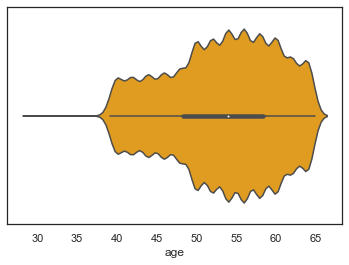

In [20]:
sns.violinplot(data.age,color='orange')

- We conclude records are for patients in age group 40 to 65

Now, we will remove outliers and abrupt blood pressure values.

In [21]:
(data['ap_lo']>360).sum()

952

In [22]:
(data['ap_hi']>360).sum()

39

In [23]:
# see blood pressure in range [20,360]
data= data[(data['ap_lo']<360) & (data['ap_hi']<360)].copy()
data= data[(data['ap_lo']>20) & (data['ap_hi']>20)].copy()

# higher should be larger than lower
data=data[data['ap_hi']>data['ap_lo']]

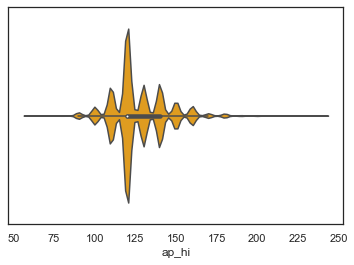

In [24]:
sns.violinplot(data.ap_hi,color='orange');

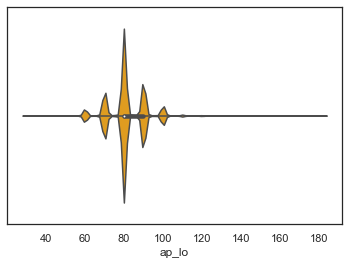

In [25]:
sns.violinplot(data.ap_lo,color='orange');

In [26]:
#creating dummy variables for categorical columns ()

data['cholesterol']=data['cholesterol'].map({ 1: 'normal', 2: 'a_normal', 3: 'well_normal'})
data['gluc']=data['gluc'].map({ 1: 'normal', 2: 'a_normal', 3: 'well_normal'})
dummies = pd.get_dummies(data[['cholesterol','gluc']],drop_first=True)
final_data = pd.concat([data,dummies],axis=1)
final_data.drop(['cholesterol','gluc'],axis=1,inplace=True)
final_data.head(10)

,age,gender,ap_hi,ap_lo,smoke,alco,active,cardio,bmi,cholesterol_normal,cholesterol_well_normal,gluc_normal,gluc_well_normal
0,50.4,0,110,80,0,0,1,0,22.0,1,0,1,0
1,55.4,1,140,90,0,0,1,1,34.9,0,1,1,0
2,51.6,1,130,70,0,0,0,1,23.5,0,1,1,0
3,48.2,0,150,100,0,0,1,1,28.7,1,0,1,0
4,47.8,1,100,60,0,0,0,0,23.0,1,0,1,0
5,60.0,1,120,80,0,0,0,0,29.4,0,0,0,0
6,60.5,1,130,80,0,0,1,0,37.7,0,1,1,0
7,61.8,0,130,90,0,0,1,1,30.0,0,1,0,1
8,48.4,1,110,70,0,0,1,0,28.4,1,0,1,0
9,54.3,1,110,60,0,0,0,0,25.3,1,0,1,0


<AxesSubplot:>

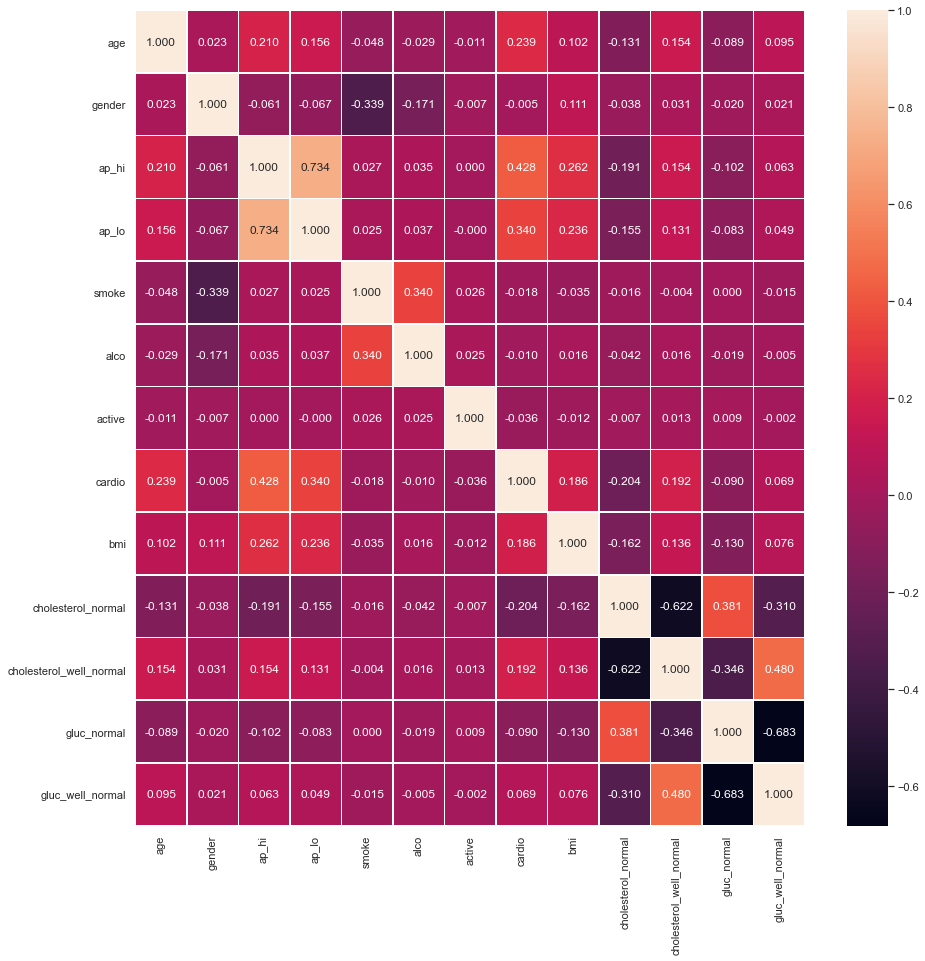

In [27]:
corr = final_data.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

In [28]:
#plotting using plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

print('Correlation of features with target variable')
final_data.corr()['cardio'].sort_values()[:-1].iplot(kind='barh');

Correlation of features with target variable


### Splitting and Standardizing data

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(final_data.drop('cardio',axis=1),final_data.cardio,test_size=0.30)

to_be_scaled_feat = ['age', 'ap_hi', 'ap_lo','bmi']
other_feat = ['gender', 'cholesterol_normal', 'cholesterol_well above normal',
       'gluc_normal', 'gluc_well above normal', 'smoke', 'alco', 'active']
scaler=StandardScaler()
scaler.fit(X_train[to_be_scaled_feat])
X_train[to_be_scaled_feat] = scaler.transform(X_train[to_be_scaled_feat])
X_test[to_be_scaled_feat] = scaler.transform(X_test[to_be_scaled_feat])

### Modelling

In [30]:
# importing classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report

classifiers = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'XGBoost' : XGBClassifier()
}
results=pd.DataFrame(columns=['Accuracy in %','F1-score'])
for method,func in classifiers.items():
    func.fit(X_train,y_train)
    pred = func.predict(X_test)
    results.loc[method]= [100*np.round(accuracy_score(y_test,pred),decimals=4),
                         round(f1_score(y_test,pred),2)]
results.sort_values(by='Accuracy in %',ascending=False).style.highlight_max()

,Accuracy in %,F1-score
XGBoost,72.700000,0.720000
Logistic Regression,72.390000,0.710000
Random Forest,69.180000,0.690000
Decision Tree,62.870000,0.630000
